<h1>Sentiment Analysis</h1>
<h3>Data 602: Week 09 Assignment</h3>
<h3>Submitted By: Srashti Soni (CV33938)</h3>

In [22]:
!pip install nltk

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('train.tsv', sep = '\t')

In [29]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [31]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

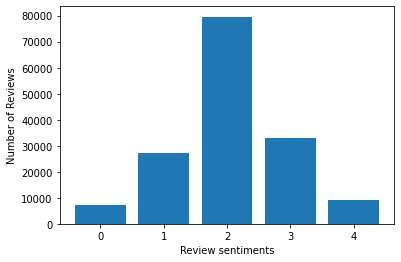

In [32]:
sentiment_count = df.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Review sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [37]:
#Generating the document term matrix by using scikitlearn’s CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vector=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer=token.tokenize)
text_counts=count_vector.fit_transform(df['Phrase'])

In [38]:
#Splitting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=1)

In [39]:
#creating a MNB classifier object using the MultinomialNB() function
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf=MultinomialNB().fit(X_train, y_train)
prediction = clf.predict(X_test)
print("Multinomial Accuracy:", metrics.accuracy_score(y_test,prediction))

Multinomial Accuracy: 0.6049169122986885


<b>We got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.Hence, we can use feature generation using TF-IDF to improve the accuracy.</b>

In [41]:
#Use TfidfVectorizer-transformed data and split it into training and test datasets
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Phrase'])

In [42]:
#splitiing the training and test data
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Sentiment'], test_size=0.3, random_state=123)

In [43]:
# Build the text classification model using TF-IDF. Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
prediction= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, prediction))

MultinomialNB Accuracy: 0.5865265496176684


<b>No, the accuracy is not good as we got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve the accuracy by using some other preprocessing or feature engineering.</b>